In [2]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

sentence = "The quick brown fox jumps over the lazy dog."
inputs = tokenizer(sentence, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

# Get the mean of token embeddings to create a sentence embedding
token_embeddings = outputs.last_hidden_state
sentence_embedding = torch.mean(token_embeddings, dim=1)
print(sentence_embedding)

/Users/jimmyzhang/Development/sae/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/jimmyzhang/Development/sae/myenv/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


tensor([[-1.4466e-02, -7.4888e-02,  5.6368e-02,  4.5170e-03,  4.0891e-01,
          2.5804e-02, -7.5612e-02,  4.7453e-01, -1.8956e-03, -1.5011e-01,
         -1.0119e-01, -1.5718e-01, -2.1705e-01, -1.6252e-02, -4.5525e-01,
         -2.5191e-01,  2.0256e-01, -2.0102e-02, -1.6217e-01, -8.5935e-03,
          1.9837e-01, -3.7650e-01, -5.1490e-01, -6.7321e-02,  4.7553e-01,
          2.2702e-01, -3.7372e-03,  2.4479e-01, -3.7153e-01,  1.7459e-02,
          2.2193e-01, -1.3309e-01, -1.1020e-02,  1.4927e-01, -1.6918e-01,
         -3.3690e-02,  4.0328e-02, -3.5493e-01, -4.4815e-01,  8.7867e-02,
         -2.4535e-01, -5.4502e-02, -8.5848e-02, -8.2122e-02,  1.0064e-01,
         -4.1189e-01,  6.9580e-02, -2.2557e-01,  7.4127e-01, -3.2274e-01,
         -5.2064e-01,  5.7741e-01, -3.2543e-01,  1.8200e-01, -3.3087e-01,
          2.8472e-01,  3.9729e-01, -1.5372e-01,  1.5706e-01, -2.7112e-01,
         -1.5829e-01,  3.0283e-01,  3.3324e-01, -1.7339e-01, -3.6901e-01,
          4.4814e-01, -2.4117e-01,  3.

In [3]:
inputs

{'input_ids': tensor([[  101,  1996,  4248,  2829,  4419, 14523,  2058,  1996, 13971,  3899,
          1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [4]:
tokenizer.decode([101, 1996, 4248, 2829, 4419, 14523, 2058, 1996, 13971, 3899, 1012, 102])

'[CLS] the quick brown fox jumps over the lazy dog. [SEP]'

In [5]:
from transformers import AutoTokenizer

# Load a pre-trained tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Example sentence
sentence = "The quick brown fox jumped over the lazy dog."

# Tokenize the sentence
encoded_input = tokenizer(sentence, return_tensors='pt')

# Display the result
print(encoded_input)

# Decode the input_ids back to text to verify
decoded_text = tokenizer.decode(encoded_input['input_ids'][0])
print(f"Decoded text: {decoded_text}")

{'input_ids': tensor([[  101,  1996,  4248,  2829,  4419,  5598,  2058,  1996, 13971,  3899,
          1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
Decoded text: [CLS] the quick brown fox jumped over the lazy dog. [SEP]


/Users/jimmyzhang/Development/sae/myenv/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
decoded_text = tokenizer.decode(encoded_input['input_ids'][0][0])

In [7]:
decoded_text

'[CLS]'

In [9]:
print(tokenizer.decode(encoded_input['input_ids'][0][1]))

the


In [10]:
corpus = [
    "Machine learning is a field of artificial intelligence.",
    "Artificial intelligence is about making computers smart.",
    "Deep learning is a subset of machine learning.",
    "Neural networks are a type of deep learning model."
]

# Query
query = "What is machine learning?"

# Encode the corpus and the query
corpus_embeddings = model.encode(corpus)
query_embedding = model.encode(query)

# Compute cosine similarity between the query and each document in the corpus
cosine_similarities = cosine_similarity([query_embedding], corpus_embeddings)[0]

# Find the most similar document
most_similar_idx = np.argmax(cosine_similarities)
print(f"Most similar document: {corpus[most_similar_idx]}")

AttributeError: 'BertModel' object has no attribute 'encode'

In [11]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Example sentences
sentences = ["This is a sentence.", "Each sentence will have its own embedding."]

# Generate embeddings for the sentences
embeddings = model.encode(sentences)

# Output the shape of the embeddings
print(embeddings.shape)  # Output: (2, 384) -> 2 sentences, each with a 384-dimensional embedding

# Print the actual embedding for the first sentence
print(embeddings[0])  # The embedding vector for the first sentence

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/jimmyzhang/Development/sae/myenv/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


(2, 384)
[ 8.21106508e-02  9.57397372e-02  1.09745581e-02  3.99055518e-02
  3.58279352e-03  2.37623546e-02 -7.54154800e-03 -3.96370143e-02
  7.53304809e-02  2.61355024e-02  7.67545626e-02 -4.00632583e-02
 -6.95517461e-04 -1.24400938e-02  2.72372831e-03  1.70454122e-02
  4.06565815e-02 -4.97856177e-02 -4.39753681e-02  1.42886527e-02
  1.36177251e-02  9.14743468e-02  1.47043513e-02  7.73377623e-03
  8.07993393e-03  7.28756236e-03 -4.63310480e-02  8.05791542e-02
  4.26285043e-02 -8.81169830e-03 -4.51241881e-02 -7.66326906e-03
  5.41319028e-02  4.92665917e-02  2.95620933e-02 -1.62078682e-02
  4.43056785e-03  4.29376587e-02  3.99881741e-04 -1.56984441e-02
  3.21975462e-02 -1.88571010e-02  3.39318775e-02  2.10538786e-02
 -9.60173551e-03  5.55275753e-03 -1.30042145e-02 -3.12802084e-02
 -4.37227311e-03 -2.12491993e-02 -9.58887115e-02 -8.21873173e-02
 -2.51269732e-02 -1.54148380e-03  1.06394216e-02  4.45450842e-02
  8.37606490e-02 -7.25318072e-03  3.55597436e-02  4.33876691e-03
 -3.71676013e-02

In [14]:
# Example corpus (documents)
corpus = [
    "Machine learning is a field of artificial intelligence.",
    "Artificial intelligence is about making computers smart.",
    "Deep learning is a subset of machine learning.",
    "Neural networks are a type of deep learning model."
]

# Query
query = "What is machine learning?"

# Encode the corpus and the query
corpus_embeddings = model.encode(corpus)
query_embedding = model.encode(query)

# Compute cosine similarity between the query and each document in the corpus
cosine_similarities = cosine_similarity([query_embedding], corpus_embeddings)[0]

# Find the most similar document
most_similar_idx = np.argmax(cosine_similarities)
print(f"Most similar document: {corpus[most_similar_idx]}")

Most similar document: Machine learning is a field of artificial intelligence.


In [13]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Example sentences
sentences = ["This is a sentence.", "This is a similar sentence.", "This sentence is completely different."]

# Generate embeddings
embeddings = model.encode(sentences)

# Compute cosine similarity between sentence embeddings
similarity_matrix = cosine_similarity(embeddings)

# Print the similarity matrix
print(similarity_matrix)

[[1.         0.8089289  0.55689603]
 [0.8089289  1.         0.6168437 ]
 [0.55689603 0.6168437  0.9999998 ]]


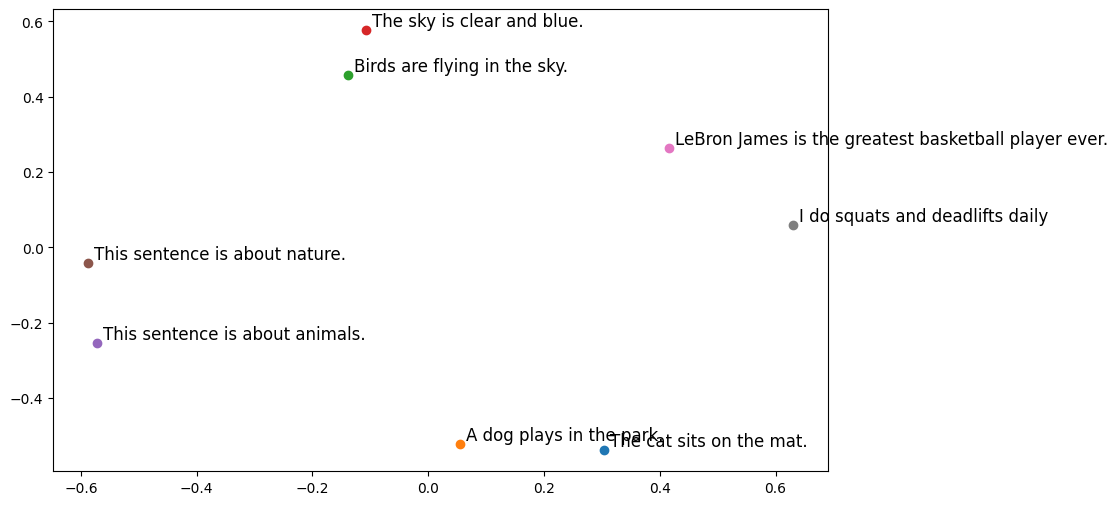

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Example sentences
sentences = [
    "The cat sits on the mat.",
    "A dog plays in the park.",
    "Birds are flying in the sky.",
    "The sky is clear and blue.",
    "This sentence is about animals.",
    "This sentence is about nature.",
    "LeBron James is the greatest basketball player ever.",
    "I do squats and deadlifts daily"
]

# Generate embeddings
embeddings = model.encode(sentences)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the reduced embeddings
plt.figure(figsize=(10, 6))
for i, sentence in enumerate(sentences):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, sentence, fontsize=12)
plt.show()

In [22]:
from sklearn.cluster import KMeans

# Example sentences
sentences = [
    "I love playing football.",
    "Soccer is a popular sport worldwide.",
    "Artificial intelligence is transforming industries.",
    "Machine learning is a subset of AI.",
    "Deep learning is part of AI.",
    "Many people enjoy playing basketball."
]

# Generate embeddings
embeddings = model.encode(sentences)

# Cluster the embeddings using KMeans
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(embeddings)

# Print cluster assignments for each sentence
for i, sentence in enumerate(sentences):
    print(f"Sentence: '{sentence}' is in cluster {kmeans.labels_[i]}")

Sentence: 'I love playing football.' is in cluster 1
Sentence: 'Soccer is a popular sport worldwide.' is in cluster 1
Sentence: 'Artificial intelligence is transforming industries.' is in cluster 0
Sentence: 'Machine learning is a subset of AI.' is in cluster 0
Sentence: 'Deep learning is part of AI.' is in cluster 0
Sentence: 'Many people enjoy playing basketball.' is in cluster 1
